### Distribution of averages and differences: the heights of men in the United States are approximately normally distributed with mean 69.1 inches and standard deviation 2.9 inches. The heights of women are approximately normally distributed with mean 63.7 inches and standard deviation 2.7 inches. Let x be the average height of 100 randomly sampled men, and y be the average height of 100 randomly sampled women. In R, create 1000 simulations of x − y and plot their histogram. Using the simulations, compute the mean and standard deviation of the distribution of x − y and compare to their exact values.

In [1]:
library(plyr)
library(ggplot2)

In [2]:
N <- 100

men.height.mean <- 69.1
men.height.stdev <- 2.9

women.height.mean <- 63.7
women.height.stdev <- 2.7

In [3]:
sims <- 1000

In [4]:
observations_men <- rnorm(N * sims, mean=men.height.mean, sd = men.height.stdev)
observations_women <- rnorm(N * sims, mean=women.height.mean, sd = women.height.stdev)

In [5]:
y_men <- matrix(observations_men, nrow=sims, ncol=N, byrow = F)
y_women <- matrix(observations_women, nrow=sims, ncol=N, byrow = F)

In [6]:
mydata <- data.frame(out_men = rowMeans(y_men), out_women = rowMeans(y_women))

In [7]:
mydata['diff'] = mydata['out_men'] - mydata['out_women']

In [8]:
mydata[0:3,]

,out_men,out_women,diff
1,69.197981,63.394948,5.803033
2,69.425400,63.594956,5.830444
3,69.108333,63.863107,5.245226


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


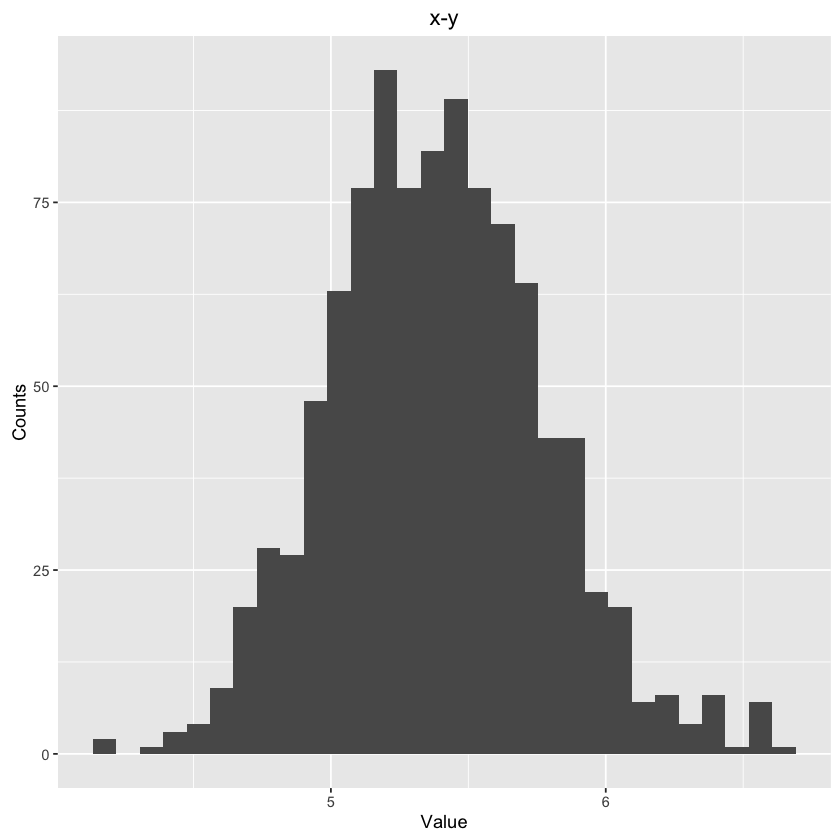

In [9]:
ggplot(mydata, aes(x=diff)) + geom_histogram() + ggtitle("x-y") + xlab("Value") + ylab("Counts") 

In [10]:
theoretical_mean <- men.height.mean - women.height.mean
theoretical_mean

[1] 5.4

In [11]:
# mean from simulation
colwise(mean)(mydata['diff'])

,diff
1,5.38829


In [12]:
theoretical_stdev <- sqrt(men.height.stdev^2 + women.height.stdev^2)
theoretical_stdev

[1] 3.962323

In [13]:
#stdev from simulation
colwise(sd)(mydata['diff'])

,diff
1,0.3884123


The mean and stdev obtained from simulation are in the neighborhood of the theoretical values.